## Import of Dataframe and necessary modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sql_functions import get_dataframe
pd.set_option('display.max_columns', 100)

## Import dataframe

In [2]:
from master_df import setup

df_master = setup()

df_master.fillna(0, inplace=True)

In [3]:
df_master

,lfnr,lieferant,artnr,beschreibung,index,basispreis,basispr_summe,gesamt_lager,ltz_vk_ges,wen_lager,ltz_vk_wen,rgb_lager,ltz_vk_rgb,amb_lager,ltz_vk_amb,cha_lager,ltz_vk_cha,str_lager,ltz_vk_str,pas_lager,ltz_vk_pas,lan_lager,ltz_vk_lan,müh_lager,ltz_vk_müh,ros_lager,ltz_vk_ros,gesamt_vk,wen_vk,rgb_vk,str_vk,pas_vk,amb_vk,cha_vk,lan_vk,müh_vk,ros_vk
0,430,Eberspächer Abgas,08.607.83,"N CORSA D 1,0L 44KW BJ 2006",0,75.36,0.00,0.00,2018-11-07 00:00:00,0.00,0,0.00,2018-11-07 00:00:00,0.00,2017-08-08 00:00:00,0.00,2016-04-29 00:00:00,0.00,2017-12-14 00:00:00,0.00,0,0.00,2017-08-31 00:00:00,0.00,0,0.00,2014-03-26 00:00:00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,430,Eberspächer Abgas,08.607.81,"M CORSA D 1,4L 66KW BJ 2006",0,93.63,0.00,0.00,2021-08-04 00:00:00,0.00,2021-08-04 00:00:00,0.00,2017-07-10 00:00:00,0.00,2021-04-26 00:00:00,0.00,2021-04-28 00:00:00,0.00,2018-09-13 00:00:00,0.00,2019-07-31 00:00:00,0.00,2016-06-24 00:00:00,0.00,0,0.00,2015-05-04 00:00:00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,430,Eberspächer Abgas,08.607.85,"N CORSA D 1,4L 66KW BJ 2006",0,76.95,0.00,0.00,2021-07-14 00:00:00,0.00,2021-07-14 00:00:00,0.00,0,0.00,2021-04-26 00:00:00,0.00,0,0.00,2020-09-29 00:00:00,0.00,2019-07-31 00:00:00,0.00,2018-11-07 00:00:00,0.00,0,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,430,Eberspächer Abgas,08.607.80,"M CORSA D 1,0L 44KW BJ 2006",0,80.07,0.00,0.00,2017-12-14 00:00:00,0.00,2013-09-24 00:00:00,0.00,0,0.00,2015-05-15 00:00:00,0.00,2016-04-29 00:00:00,0.00,2017-12-14 00:00:00,0.00,0,0.00,0,0.00,0,0.00,2015-10-19 00:00:00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,430,Eberspächer Abgas,08.607.87,"N CORSA D 1,3L CDTI 55KW BJ",0,49.98,0.00,0.00,2021-01-08 00:00:00,0.00,2021-01-08 00:00:00,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366075,0,BOSCH,183858006,CENTRO-BATTERIE 12V 80AH SLI,0,40.98,0.00,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,-3.00,-2.00,0.00,-1.00,0.00,0.00,0.00,0.00,0.00,0.00
366076,0,BOSCH,242242501,ZÜNDKERZE SUPER 4 FR 56,0,2.41,0.00,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,-4.00,6.00,-10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
366077,0,BOSCH,242140543,ZÜNDKERZE,0,5.29,0.00,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,-6.00,0.00,-3.00,0.00,-3.00,0.00,0.00,0.00,0.00,0.00
366078,0,BOSCH,242229739,"ZÜNDKERZE DPLA HR8NPP302 1,1mm",0,4.08,0.00,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,-10.00,0.00,-10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


## Quality of stock for a certain article to be assessed as "good" or "bad"


In [4]:
""" quality_stock_good_all = df_master.query('gesamt_lager > 0 and gesamt_vk >= 3').reset_index()
quality_stock_bad_all = df_master.query('gesamt_lager > 0  and gesamt_vk < 3').reset_index()

quality_stock_good_weiden = df_master.query('wen_lager > 0 and wen_vk >= 3').reset_index()
quality_stock_bad_weiden = df_master.query('wen_lager > 0 and wen_vk < 3').reset_index()

quality_stock_good_regensburg = df_master.query('rgb_lager > 0 and rgb_vk >= 3').reset_index()
quality_stock_bad_regensburg = df_master.query('rgb_lager > 0 and rgb_vk < 3').reset_index()

quality_stock_good_amberg = df_master.query('amb_lager > 0 and amb_vk >= 3').reset_index()
quality_stock_bad_amberg = df_master.query('amb_lager > 0 and amb_vk < 3').reset_index()

quality_stock_good_cham = df_master.query('cha_lager > 0 and cha_vk >= 3').reset_index()
quality_stock_bad_cham = df_master.query('cha_lager > 0 and cha_vk < 3').reset_index()

quality_stock_good_straubing = df_master.query('str_lager > 0 and str_vk >= 3').reset_index()
quality_stock_bad_straubing = df_master.query('str_lager > 0 and str_vk < 3').reset_index()

quality_stock_good_passau = df_master.query('pas_lager > 0 and pas_vk >= 3').reset_index()
quality_stock_bad_passau = df_master.query('pas_lager > 0 and pas_vk < 3').reset_index()

quality_stock_good_landshut = df_master.query('lan_lager > 0 and lan_vk >= 3').reset_index()
quality_stock_bad_landshut = df_master.query('lan_lager > 0 and lan_vk < 3').reset_index()

quality_stock_good_mühldorf = df_master.query('müh_lager > 0 and müh_vk >= 3').reset_index()
quality_stock_bad_mühldorf = df_master.query('müh_lager > 0 and müh_vk < 3').reset_index()

quality_stock_good_rosenheim = df_master.query('ros_lager > 0 and ros_vk >= 3').reset_index()
quality_stock_bad_rosenheim = df_master.query('ros_lager > 0 and ros_vk < 3').reset_index() """

" quality_stock_good_all = df_master.query('gesamt_lager > 0 and gesamt_vk >= 3').reset_index()\nquality_stock_bad_all = df_master.query('gesamt_lager > 0  and gesamt_vk < 3').reset_index()\n\nquality_stock_good_weiden = df_master.query('wen_lager > 0 and wen_vk >= 3').reset_index()\nquality_stock_bad_weiden = df_master.query('wen_lager > 0 and wen_vk < 3').reset_index()\n\nquality_stock_good_regensburg = df_master.query('rgb_lager > 0 and rgb_vk >= 3').reset_index()\nquality_stock_bad_regensburg = df_master.query('rgb_lager > 0 and rgb_vk < 3').reset_index()\n\nquality_stock_good_amberg = df_master.query('amb_lager > 0 and amb_vk >= 3').reset_index()\nquality_stock_bad_amberg = df_master.query('amb_lager > 0 and amb_vk < 3').reset_index()\n\nquality_stock_good_cham = df_master.query('cha_lager > 0 and cha_vk >= 3').reset_index()\nquality_stock_bad_cham = df_master.query('cha_lager > 0 and cha_vk < 3').reset_index()\n\nquality_stock_good_straubing = df_master.query('str_lager > 0 and s

In [5]:
""" quality_stock_bad_all """

' quality_stock_bad_all '

## Summary how much of the stock is sold per year (in %)

In [6]:
""" sales_of_stock_all = (df_master[df_master['gesamt_vk'] > 0].count() / df_master[df_master['gesamt_lager'] > 0].count()) * 100

sales_of_stock_weiden = (df_master[df_master['wen_vk'] > 0].count() / df_master[df_master['wen_lager'] > 0].count()) * 100

sales_of_stock_regensburg = (df_master[df_master['rgb_vk'] > 0].count() / df_master[df_master['rgb_lager'] > 0].count()) * 100

sales_of_stock_amberg = (df_master[df_master['amb_vk'] > 0].count() / df_master[df_master['amb_lager'] > 0].count()) * 100

sales_of_stock_cham = (df_master[df_master['cha_vk'] > 0].count() / df_master[df_master['cha_lager'] > 0].count()) * 100

sales_of_stock_straubing = (df_master[df_master['str_vk'] > 0].count() / df_master[df_master['str_lager'] > 0].count()) * 100

sales_of_stock_passau = (df_master[df_master['pas_vk'] > 0].count() / df_master[df_master['pas_lager'] > 0].count()) * 100

sales_of_stock_landshut = (df_master[df_master['lan_vk'] > 0].count() / df_master[df_master['lan_lager'] > 0].count()) * 100

sales_of_stock_mühldorf = (df_master[df_master['müh_vk'] > 0].count() / df_master[df_master['müh_lager'] > 0].count()) * 100

sales_of_stock_rosenheim = (df_master[df_master['ros_vk'] > 0].count() / df_master[df_master['ros_lager'] > 0].count()) * 100 """

" sales_of_stock_all = (df_master[df_master['gesamt_vk'] > 0].count() / df_master[df_master['gesamt_lager'] > 0].count()) * 100\n\nsales_of_stock_weiden = (df_master[df_master['wen_vk'] > 0].count() / df_master[df_master['wen_lager'] > 0].count()) * 100\n\nsales_of_stock_regensburg = (df_master[df_master['rgb_vk'] > 0].count() / df_master[df_master['rgb_lager'] > 0].count()) * 100\n\nsales_of_stock_amberg = (df_master[df_master['amb_vk'] > 0].count() / df_master[df_master['amb_lager'] > 0].count()) * 100\n\nsales_of_stock_cham = (df_master[df_master['cha_vk'] > 0].count() / df_master[df_master['cha_lager'] > 0].count()) * 100\n\nsales_of_stock_straubing = (df_master[df_master['str_vk'] > 0].count() / df_master[df_master['str_lager'] > 0].count()) * 100\n\nsales_of_stock_passau = (df_master[df_master['pas_vk'] > 0].count() / df_master[df_master['pas_lager'] > 0].count()) * 100\n\nsales_of_stock_landshut = (df_master[df_master['lan_vk'] > 0].count() / df_master[df_master['lan_lager'] > 0

In [7]:
""" print(sales_of_stock_all['gesamt_lager'])

print(sales_of_stock_weiden['wen_lager'])

print(sales_of_stock_regensburg['rgb_lager'])

print(sales_of_stock_amberg['amb_lager'])

print(sales_of_stock_cham['cha_lager'])

print(sales_of_stock_straubing['str_lager'])

print(sales_of_stock_passau['pas_lager'])

print(sales_of_stock_landshut['lan_lager'])

print(sales_of_stock_mühldorf['müh_lager'])

print(sales_of_stock_rosenheim['ros_lager']) """

" print(sales_of_stock_all['gesamt_lager'])\n\nprint(sales_of_stock_weiden['wen_lager'])\n\nprint(sales_of_stock_regensburg['rgb_lager'])\n\nprint(sales_of_stock_amberg['amb_lager'])\n\nprint(sales_of_stock_cham['cha_lager'])\n\nprint(sales_of_stock_straubing['str_lager'])\n\nprint(sales_of_stock_passau['pas_lager'])\n\nprint(sales_of_stock_landshut['lan_lager'])\n\nprint(sales_of_stock_mühldorf['müh_lager'])\n\nprint(sales_of_stock_rosenheim['ros_lager']) "

## Visualization stock quality

In [8]:
#create quality_gesamt

""" PE_condition = [
    (df_master['gesamt_lager'] > 0) & (df_master['gesamt_vk'] >= 3),
    (df_master['gesamt_lager'] > 0) & (df_master['gesamt_vk'] < 3),
    (df_master['gesamt_lager'] <= 0)
]
PE_categories = ['Good', 'Bad', 'not in stock']
df_master['quality_gesamt'] = np.select(PE_condition, PE_categories) """

" PE_condition = [\n    (df_master['gesamt_lager'] > 0) & (df_master['gesamt_vk'] >= 3),\n    (df_master['gesamt_lager'] > 0) & (df_master['gesamt_vk'] < 3),\n    (df_master['gesamt_lager'] <= 0)\n]\nPE_categories = ['Good', 'Bad', 'not in stock']\ndf_master['quality_gesamt'] = np.select(PE_condition, PE_categories) "

In [9]:
""" #create new columns ti measure the quality

locations = ['gesamt', 'wen', 'rgb', 'amb', 'cha', 'str', 'pas', 'lan', 'müh', 'ros']
PE_categories = ['4+ sales, in stock', '4+ sales, no stock', '1-3 sales, in stock', '1-3 sales, no stock', '0 sales, in stock']

for x in locations:
    PE_condition = [
        (df_master[x+'_lager'] > 0) & (df_master[x+'_vk'] > 3),
        (df_master[x+'_lager'] == 0) & (df_master[x+'_vk'] > 3),
        (df_master[x+'_lager'] > 0) & (df_master[x+'_vk'] < 3) & (df_master[x+'_vk'] > 0),
        (df_master[x+'_lager'] == 0) & (df_master[x+'_vk'] < 3) & (df_master[x+'_vk'] > 0),
        (df_master[x+'_lager'] > 0) & (df_master[x+'_vk'] == 0)
    ]

    df_master[x+'_quality'] = np.select(PE_condition, PE_categories)

df_master """



" #create new columns ti measure the quality\n\nlocations = ['gesamt', 'wen', 'rgb', 'amb', 'cha', 'str', 'pas', 'lan', 'müh', 'ros']\nPE_categories = ['4+ sales, in stock', '4+ sales, no stock', '1-3 sales, in stock', '1-3 sales, no stock', '0 sales, in stock']\n\nfor x in locations:\n    PE_condition = [\n        (df_master[x+'_lager'] > 0) & (df_master[x+'_vk'] > 3),\n        (df_master[x+'_lager'] == 0) & (df_master[x+'_vk'] > 3),\n        (df_master[x+'_lager'] > 0) & (df_master[x+'_vk'] < 3) & (df_master[x+'_vk'] > 0),\n        (df_master[x+'_lager'] == 0) & (df_master[x+'_vk'] < 3) & (df_master[x+'_vk'] > 0),\n        (df_master[x+'_lager'] > 0) & (df_master[x+'_vk'] == 0)\n    ]\n\n    df_master[x+'_quality'] = np.select(PE_condition, PE_categories)\n\ndf_master "

In [10]:
""" # Erstellen Sie das Balkendiagramm

df_master_gesamt = df_master#.query('gesamt_quality != "not in stock, less 3 sales"')

# Erstellen Sie das Balkendiagramm
plt.title("Qualität gesamt")

plt.xlabel('Qualität')
plt.ylabel('Anzahl')

ax = sns.barplot(x=df_master_gesamt['gesamt_quality'].value_counts().index, y=df_master_gesamt['gesamt_quality'].value_counts(), data=df_master_gesamt)
plt.xticks(rotation=90)

for p in ax.patches:
    # Erhalte die Höhe und die Position jedes Balkens
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2

    # Füge einen Text über dem Balken hinzu
    ax.text(x, height + 0.1, f'{height:.0f}', ha='center')
    
plt.show() """


' # Erstellen Sie das Balkendiagramm\n\ndf_master_gesamt = df_master#.query(\'gesamt_quality != "not in stock, less 3 sales"\')\n\n# Erstellen Sie das Balkendiagramm\nplt.title("Qualität gesamt")\n\nplt.xlabel(\'Qualität\')\nplt.ylabel(\'Anzahl\')\n\nax = sns.barplot(x=df_master_gesamt[\'gesamt_quality\'].value_counts().index, y=df_master_gesamt[\'gesamt_quality\'].value_counts(), data=df_master_gesamt)\nplt.xticks(rotation=90)\n\nfor p in ax.patches:\n    # Erhalte die Höhe und die Position jedes Balkens\n    height = p.get_height()\n    x = p.get_x() + p.get_width() / 2\n\n    # Füge einen Text über dem Balken hinzu\n    ax.text(x, height + 0.1, f\'{height:.0f}\', ha=\'center\')\n    \nplt.show() '

In [11]:
""" df_master_weiden = df_master#.query('gesamt_quality != "not in stock, less 3 sales"')

# Erstellen Sie das Balkendiagramm
plt.title("Qualität Weiden")

plt.xlabel('Qualität')
plt.ylabel('Anzahl')

ax = sns.barplot(x=df_master_weiden['wen_quality'].value_counts().index, y=df_master_weiden['wen_quality'].value_counts(), data=df_master_weiden)
plt.xticks(rotation=90)

for p in ax.patches:
    # Erhalte die Höhe und die Position jedes Balkens
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2

    # Füge einen Text über dem Balken hinzu
    ax.text(x, height + 0.1, f'{height:.0f}', ha='center')

plt.show() """

' df_master_weiden = df_master#.query(\'gesamt_quality != "not in stock, less 3 sales"\')\n\n# Erstellen Sie das Balkendiagramm\nplt.title("Qualität Weiden")\n\nplt.xlabel(\'Qualität\')\nplt.ylabel(\'Anzahl\')\n\nax = sns.barplot(x=df_master_weiden[\'wen_quality\'].value_counts().index, y=df_master_weiden[\'wen_quality\'].value_counts(), data=df_master_weiden)\nplt.xticks(rotation=90)\n\nfor p in ax.patches:\n    # Erhalte die Höhe und die Position jedes Balkens\n    height = p.get_height()\n    x = p.get_x() + p.get_width() / 2\n\n    # Füge einen Text über dem Balken hinzu\n    ax.text(x, height + 0.1, f\'{height:.0f}\', ha=\'center\')\n\nplt.show() '

In [12]:
""" df_master_regensburg = df_master#.query('gesamt_quality != "not in stock, less 3 sales"')

# Erstellen Sie das Balkendiagramm
plt.title("Qualität Regensburg")

plt.xlabel('Qualität')
plt.ylabel('Anzahl')

ax = sns.barplot(x=df_master_regensburg['rgb_quality'].value_counts().index, y=df_master_regensburg['rgb_quality'].value_counts(), data=df_master_regensburg)

for p in ax.patches:
    # Erhalte die Höhe und die Position jedes Balkens
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2

    # Füge einen Text über dem Balken hinzu
    ax.text(x, height + 0.1, f'{height:.0f}', ha='center')

plt.xticks(rotation=90)
plt.show() """

' df_master_regensburg = df_master#.query(\'gesamt_quality != "not in stock, less 3 sales"\')\n\n# Erstellen Sie das Balkendiagramm\nplt.title("Qualität Regensburg")\n\nplt.xlabel(\'Qualität\')\nplt.ylabel(\'Anzahl\')\n\nax = sns.barplot(x=df_master_regensburg[\'rgb_quality\'].value_counts().index, y=df_master_regensburg[\'rgb_quality\'].value_counts(), data=df_master_regensburg)\n\nfor p in ax.patches:\n    # Erhalte die Höhe und die Position jedes Balkens\n    height = p.get_height()\n    x = p.get_x() + p.get_width() / 2\n\n    # Füge einen Text über dem Balken hinzu\n    ax.text(x, height + 0.1, f\'{height:.0f}\', ha=\'center\')\n\nplt.xticks(rotation=90)\nplt.show() '

In [13]:
""" df_master_amberg = df_master#.query('gesamt_quality != "not in stock, less 3 sales"')

# Erstellen Sie das Balkendiagramm
plt.title("Qualität Amberg")

plt.xlabel('Qualität')
plt.ylabel('Anzahl')

ax = sns.barplot(x=df_master_amberg['amb_quality'].value_counts().index, y=df_master_amberg['amb_quality'].value_counts(), data=df_master_amberg)

for p in ax.patches:
    # Erhalte die Höhe und die Position jedes Balkens
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2

    # Füge einen Text über dem Balken hinzu
    ax.text(x, height + 0.1, f'{height:.0f}', ha='center')

plt.xticks(rotation=90)
plt.show() """

' df_master_amberg = df_master#.query(\'gesamt_quality != "not in stock, less 3 sales"\')\n\n# Erstellen Sie das Balkendiagramm\nplt.title("Qualität Amberg")\n\nplt.xlabel(\'Qualität\')\nplt.ylabel(\'Anzahl\')\n\nax = sns.barplot(x=df_master_amberg[\'amb_quality\'].value_counts().index, y=df_master_amberg[\'amb_quality\'].value_counts(), data=df_master_amberg)\n\nfor p in ax.patches:\n    # Erhalte die Höhe und die Position jedes Balkens\n    height = p.get_height()\n    x = p.get_x() + p.get_width() / 2\n\n    # Füge einen Text über dem Balken hinzu\n    ax.text(x, height + 0.1, f\'{height:.0f}\', ha=\'center\')\n\nplt.xticks(rotation=90)\nplt.show() '

In [14]:
""" df_master_cham = df_master#.query('gesamt_quality != "not in stock, less 3 sales"')

# Erstellen Sie das Balkendiagramm
plt.title("Qualität Cham")

plt.xlabel('Qualität')
plt.ylabel('Anzahl')

ax = sns.barplot(x=df_master_cham['cha_quality'].value_counts().index, y=df_master_cham['cha_quality'].value_counts(), data=df_master_cham)

for p in ax.patches:
    # Erhalte die Höhe und die Position jedes Balkens
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2

    # Füge einen Text über dem Balken hinzu
    ax.text(x, height + 0.1, f'{height:.0f}', ha='center')

plt.xticks(rotation=90)
plt.show() """

' df_master_cham = df_master#.query(\'gesamt_quality != "not in stock, less 3 sales"\')\n\n# Erstellen Sie das Balkendiagramm\nplt.title("Qualität Cham")\n\nplt.xlabel(\'Qualität\')\nplt.ylabel(\'Anzahl\')\n\nax = sns.barplot(x=df_master_cham[\'cha_quality\'].value_counts().index, y=df_master_cham[\'cha_quality\'].value_counts(), data=df_master_cham)\n\nfor p in ax.patches:\n    # Erhalte die Höhe und die Position jedes Balkens\n    height = p.get_height()\n    x = p.get_x() + p.get_width() / 2\n\n    # Füge einen Text über dem Balken hinzu\n    ax.text(x, height + 0.1, f\'{height:.0f}\', ha=\'center\')\n\nplt.xticks(rotation=90)\nplt.show() '

In [15]:
""" df_master_straubing = df_master#.query('gesamt_quality != "not in stock, less 3 sales"')

# Erstellen Sie das Balkendiagramm
plt.title("Qualität Straubing")

plt.xlabel('Qualität')
plt.ylabel('Anzahl')

ax = sns.barplot(x=df_master_straubing['str_quality'].value_counts().index, y=df_master_straubing['str_quality'].value_counts(), data=df_master_straubing)

for p in ax.patches:
    # Erhalte die Höhe und die Position jedes Balkens
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2

    # Füge einen Text über dem Balken hinzu
    ax.text(x, height + 0.1, f'{height:.0f}', ha='center')

plt.xticks(rotation=90)
plt.show() """

' df_master_straubing = df_master#.query(\'gesamt_quality != "not in stock, less 3 sales"\')\n\n# Erstellen Sie das Balkendiagramm\nplt.title("Qualität Straubing")\n\nplt.xlabel(\'Qualität\')\nplt.ylabel(\'Anzahl\')\n\nax = sns.barplot(x=df_master_straubing[\'str_quality\'].value_counts().index, y=df_master_straubing[\'str_quality\'].value_counts(), data=df_master_straubing)\n\nfor p in ax.patches:\n    # Erhalte die Höhe und die Position jedes Balkens\n    height = p.get_height()\n    x = p.get_x() + p.get_width() / 2\n\n    # Füge einen Text über dem Balken hinzu\n    ax.text(x, height + 0.1, f\'{height:.0f}\', ha=\'center\')\n\nplt.xticks(rotation=90)\nplt.show() '

In [16]:
""" df_master_passau = df_master#.query('gesamt_quality != "not in stock, less 3 sales"')

# Erstellen Sie das Balkendiagramm
plt.title("Qualität Passau")

plt.xlabel('Qualität')
plt.ylabel('Anzahl')

ax = sns.barplot(x=df_master_passau['pas_quality'].value_counts().index, y=df_master_passau['pas_quality'].value_counts(), data=df_master_passau)

for p in ax.patches:
    # Erhalte die Höhe und die Position jedes Balkens
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2

    # Füge einen Text über dem Balken hinzu
    ax.text(x, height + 0.1, f'{height:.0f}', ha='center')

plt.xticks(rotation=90)
plt.show() """

' df_master_passau = df_master#.query(\'gesamt_quality != "not in stock, less 3 sales"\')\n\n# Erstellen Sie das Balkendiagramm\nplt.title("Qualität Passau")\n\nplt.xlabel(\'Qualität\')\nplt.ylabel(\'Anzahl\')\n\nax = sns.barplot(x=df_master_passau[\'pas_quality\'].value_counts().index, y=df_master_passau[\'pas_quality\'].value_counts(), data=df_master_passau)\n\nfor p in ax.patches:\n    # Erhalte die Höhe und die Position jedes Balkens\n    height = p.get_height()\n    x = p.get_x() + p.get_width() / 2\n\n    # Füge einen Text über dem Balken hinzu\n    ax.text(x, height + 0.1, f\'{height:.0f}\', ha=\'center\')\n\nplt.xticks(rotation=90)\nplt.show() '

In [17]:
""" df_master_landshut = df_master#.query('gesamt_quality != "not in stock, less 3 sales"')

# Erstellen Sie das Balkendiagramm
plt.title("Qualität Landshut")

plt.xlabel('Qualität')
plt.ylabel('Anzahl')

ax = sns.barplot(x=df_master_landshut['lan_quality'].value_counts().index, y=df_master_landshut['lan_quality'].value_counts(), data=df_master_landshut)

for p in ax.patches:
    # Erhalte die Höhe und die Position jedes Balkens
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2

    # Füge einen Text über dem Balken hinzu
    ax.text(x, height + 0.1, f'{height:.0f}', ha='center')

plt.xticks(rotation=90)
plt.show() """

' df_master_landshut = df_master#.query(\'gesamt_quality != "not in stock, less 3 sales"\')\n\n# Erstellen Sie das Balkendiagramm\nplt.title("Qualität Landshut")\n\nplt.xlabel(\'Qualität\')\nplt.ylabel(\'Anzahl\')\n\nax = sns.barplot(x=df_master_landshut[\'lan_quality\'].value_counts().index, y=df_master_landshut[\'lan_quality\'].value_counts(), data=df_master_landshut)\n\nfor p in ax.patches:\n    # Erhalte die Höhe und die Position jedes Balkens\n    height = p.get_height()\n    x = p.get_x() + p.get_width() / 2\n\n    # Füge einen Text über dem Balken hinzu\n    ax.text(x, height + 0.1, f\'{height:.0f}\', ha=\'center\')\n\nplt.xticks(rotation=90)\nplt.show() '

In [18]:
""" df_master_mühldorf = df_master#.query('gesamt_quality != "not in stock, less 3 sales"')

# Erstellen Sie das Balkendiagramm
plt.title("Qualität Mühldorf")

plt.xlabel('Qualität')
plt.ylabel('Anzahl')

ax = sns.barplot(x=df_master_mühldorf['müh_quality'].value_counts().index, y=df_master_mühldorf['müh_quality'].value_counts(), data=df_master_mühldorf)

for p in ax.patches:
    # Erhalte die Höhe und die Position jedes Balkens
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2

    # Füge einen Text über dem Balken hinzu
    ax.text(x, height + 0.1, f'{height:.0f}', ha='center')

plt.xticks(rotation=90)
plt.show() """

' df_master_mühldorf = df_master#.query(\'gesamt_quality != "not in stock, less 3 sales"\')\n\n# Erstellen Sie das Balkendiagramm\nplt.title("Qualität Mühldorf")\n\nplt.xlabel(\'Qualität\')\nplt.ylabel(\'Anzahl\')\n\nax = sns.barplot(x=df_master_mühldorf[\'müh_quality\'].value_counts().index, y=df_master_mühldorf[\'müh_quality\'].value_counts(), data=df_master_mühldorf)\n\nfor p in ax.patches:\n    # Erhalte die Höhe und die Position jedes Balkens\n    height = p.get_height()\n    x = p.get_x() + p.get_width() / 2\n\n    # Füge einen Text über dem Balken hinzu\n    ax.text(x, height + 0.1, f\'{height:.0f}\', ha=\'center\')\n\nplt.xticks(rotation=90)\nplt.show() '

In [19]:
""" df_master_rosenheim = df_master#.query('gesamt_quality != "not in stock, less 3 sales"')

# Erstellen Sie das Balkendiagramm
plt.title("Qualität Rosenheim")

plt.xlabel('Qualität')
plt.ylabel('Anzahl')

ax = sns.barplot(x=df_master_rosenheim['ros_quality'].value_counts().index, y=df_master_rosenheim['ros_quality'].value_counts(), data=df_master_rosenheim)

for p in ax.patches:
    # Erhalte die Höhe und die Position jedes Balkens
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2

    # Füge einen Text über dem Balken hinzu
    ax.text(x, height + 0.1, f'{height:.0f}', ha='center')

plt.xticks(rotation=90)
plt.show() """

' df_master_rosenheim = df_master#.query(\'gesamt_quality != "not in stock, less 3 sales"\')\n\n# Erstellen Sie das Balkendiagramm\nplt.title("Qualität Rosenheim")\n\nplt.xlabel(\'Qualität\')\nplt.ylabel(\'Anzahl\')\n\nax = sns.barplot(x=df_master_rosenheim[\'ros_quality\'].value_counts().index, y=df_master_rosenheim[\'ros_quality\'].value_counts(), data=df_master_rosenheim)\n\nfor p in ax.patches:\n    # Erhalte die Höhe und die Position jedes Balkens\n    height = p.get_height()\n    x = p.get_x() + p.get_width() / 2\n\n    # Füge einen Text über dem Balken hinzu\n    ax.text(x, height + 0.1, f\'{height:.0f}\', ha=\'center\')\n\nplt.xticks(rotation=90)\nplt.show() '

In [20]:
""" display_order_stock = PE_categories

locations = {'gesamt': 'Gesamt', 
             'wen': 'Weiden', 
             'rgb': 'Regensburg', 
             'amb': 'Amberg', 
             'cha': 'Cham', 
             'str': 'Straubing', 
             'pas': 'Passau', 
             'lan': 'Landshut', 
             'müh': 'Mühldorf', 
             'ros': 'Rosenheim'}

for key, value in locations.items():
     
    location = df_master.query(key + '_quality != "0"')
    # Erstellen Sie das Balkendiagramm
    plt.title("Qualität " + value)

    plt.xlabel('Qualität')
    plt.ylabel('Anzahl')

    ax = sns.countplot(x=key + '_quality', data=location, order=display_order_stock)

    for p in ax.patches:
        # Erhalte die Höhe und die Position jedes Balkens
        height = p.get_height()
        x = p.get_x() + p.get_width() / 2

        # Füge einen Text über dem Balken hinzu
        ax.text(x, height + 0.1, f'{height:.0f}', ha='center')

    plt.xticks(rotation=90)
    plt.show() """

' display_order_stock = PE_categories\n\nlocations = {\'gesamt\': \'Gesamt\', \n             \'wen\': \'Weiden\', \n             \'rgb\': \'Regensburg\', \n             \'amb\': \'Amberg\', \n             \'cha\': \'Cham\', \n             \'str\': \'Straubing\', \n             \'pas\': \'Passau\', \n             \'lan\': \'Landshut\', \n             \'müh\': \'Mühldorf\', \n             \'ros\': \'Rosenheim\'}\n\nfor key, value in locations.items():\n     \n    location = df_master.query(key + \'_quality != "0"\')\n    # Erstellen Sie das Balkendiagramm\n    plt.title("Qualität " + value)\n\n    plt.xlabel(\'Qualität\')\n    plt.ylabel(\'Anzahl\')\n\n    ax = sns.countplot(x=key + \'_quality\', data=location, order=display_order_stock)\n\n    for p in ax.patches:\n        # Erhalte die Höhe und die Position jedes Balkens\n        height = p.get_height()\n        x = p.get_x() + p.get_width() / 2\n\n        # Füge einen Text über dem Balken hinzu\n        ax.text(x, height + 0.1, f\'{he

In [21]:
""" locations = {'gesamt': 'Gesamt', 
             'wen': 'Weiden', 
             'rgb': 'Regensburg', 
             'amb': 'Amberg', 
             'cha': 'Cham', 
             'str': 'Straubing', 
             'pas': 'Passau', 
             'lan': 'Landshut', 
             'müh': 'Mühldorf', 
             'ros': 'Rosenheim'}

for key, value in locations.items():
     
    location = df_master.query(key + '_quality != "0"')
    # Erstellen Sie das Balkendiagramm
    plt.title("Qualität " + value)

    plt.xlabel('Qualität')
    plt.ylabel('Anzahl')

    ax = sns.countplot(x=key + '_quality', data=location, order=display_order_stock)

    # Erhalten Sie die Gesamtzahl der Qualitätsspalte
    total = location[key + '_quality'].count()

    # Beschriften Sie die Balken mit dem fmt-Parameter
    ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:.1f}%')

    # Fügen Sie etwas Platz am Ende des Balkens für die Beschriftungen hinzu
    ax.margins(x=0.1)

    plt.xticks(rotation=90)
    plt.show() """

' locations = {\'gesamt\': \'Gesamt\', \n             \'wen\': \'Weiden\', \n             \'rgb\': \'Regensburg\', \n             \'amb\': \'Amberg\', \n             \'cha\': \'Cham\', \n             \'str\': \'Straubing\', \n             \'pas\': \'Passau\', \n             \'lan\': \'Landshut\', \n             \'müh\': \'Mühldorf\', \n             \'ros\': \'Rosenheim\'}\n\nfor key, value in locations.items():\n     \n    location = df_master.query(key + \'_quality != "0"\')\n    # Erstellen Sie das Balkendiagramm\n    plt.title("Qualität " + value)\n\n    plt.xlabel(\'Qualität\')\n    plt.ylabel(\'Anzahl\')\n\n    ax = sns.countplot(x=key + \'_quality\', data=location, order=display_order_stock)\n\n    # Erhalten Sie die Gesamtzahl der Qualitätsspalte\n    total = location[key + \'_quality\'].count()\n\n    # Beschriften Sie die Balken mit dem fmt-Parameter\n    ax.bar_label(ax.containers[0], fmt=lambda x: f\'{(x/total)*100:.1f}%\')\n\n    # Fügen Sie etwas Platz am Ende des Balkens 

In [22]:
""" locations = ['gesamt', 'wen', 'rgb', 'amb', 'cha', 'str', 'pas', 'lan', 'müh', 'ros']
PE_categories = ['In stock, 4+ sales', 'In stock, 3 sales', 'In stock, 2 sales', 'In stock, 1 sale', 'In stock, 0 sales']

for x in locations:
    PE_condition = [
        (df_master[x+'_lager'] > 0) & (df_master[x+'_vk'] > 3),
        (df_master[x+'_lager'] > 0) & (df_master[x+'_vk'] == 3),
        (df_master[x+'_lager'] > 0) & (df_master[x+'_vk'] == 2),
        (df_master[x+'_lager'] > 0) & (df_master[x+'_vk'] == 1),
        (df_master[x+'_lager'] > 0) & (df_master[x+'_vk'] == 0)   
    ]

    df_master[x+'_quality'] = np.select(PE_condition, PE_categories)

df_master """

" locations = ['gesamt', 'wen', 'rgb', 'amb', 'cha', 'str', 'pas', 'lan', 'müh', 'ros']\nPE_categories = ['In stock, 4+ sales', 'In stock, 3 sales', 'In stock, 2 sales', 'In stock, 1 sale', 'In stock, 0 sales']\n\nfor x in locations:\n    PE_condition = [\n        (df_master[x+'_lager'] > 0) & (df_master[x+'_vk'] > 3),\n        (df_master[x+'_lager'] > 0) & (df_master[x+'_vk'] == 3),\n        (df_master[x+'_lager'] > 0) & (df_master[x+'_vk'] == 2),\n        (df_master[x+'_lager'] > 0) & (df_master[x+'_vk'] == 1),\n        (df_master[x+'_lager'] > 0) & (df_master[x+'_vk'] == 0)   \n    ]\n\n    df_master[x+'_quality'] = np.select(PE_condition, PE_categories)\n\ndf_master "

In [23]:
""" df_master.query("gesamt_quality == '0'") """

' df_master.query("gesamt_quality == \'0\'") '

In [24]:
""" display_order_quality = PE_categories

locations = {'gesamt': 'Gesamt', 
             'wen': 'Weiden', 
             'rgb': 'Regensburg', 
             'amb': 'Amberg', 
             'cha': 'Cham', 
             'str': 'Straubing', 
             'pas': 'Passau', 
             'lan': 'Landshut', 
             'müh': 'Mühldorf', 
             'ros': 'Rosenheim'}

for key, value in locations.items():
     
    location = df_master.query(key + '_quality != "löschen"')
    location = location.query(key + '_quality != "0"')
    # Erstellen Sie das Balkendiagramm
    plt.title("Qualität " + value)

    plt.xlabel('Qualität')
    plt.ylabel('Anzahl')

    ax = sns.countplot(x=key + '_quality', data=location, order=display_order_quality)

    for p in ax.patches:
        # Erhalte die Höhe und die Position jedes Balkens
        height = p.get_height()
        x = p.get_x() + p.get_width() / 2

        # Füge einen Text über dem Balken hinzu
        ax.text(x, height + 0.1, f'{height:.0f}', ha='center')

    plt.xticks(rotation=90)
    plt.show() """

' display_order_quality = PE_categories\n\nlocations = {\'gesamt\': \'Gesamt\', \n             \'wen\': \'Weiden\', \n             \'rgb\': \'Regensburg\', \n             \'amb\': \'Amberg\', \n             \'cha\': \'Cham\', \n             \'str\': \'Straubing\', \n             \'pas\': \'Passau\', \n             \'lan\': \'Landshut\', \n             \'müh\': \'Mühldorf\', \n             \'ros\': \'Rosenheim\'}\n\nfor key, value in locations.items():\n     \n    location = df_master.query(key + \'_quality != "löschen"\')\n    location = location.query(key + \'_quality != "0"\')\n    # Erstellen Sie das Balkendiagramm\n    plt.title("Qualität " + value)\n\n    plt.xlabel(\'Qualität\')\n    plt.ylabel(\'Anzahl\')\n\n    ax = sns.countplot(x=key + \'_quality\', data=location, order=display_order_quality)\n\n    for p in ax.patches:\n        # Erhalte die Höhe und die Position jedes Balkens\n        height = p.get_height()\n        x = p.get_x() + p.get_width() / 2\n\n        # Füge einen

In [25]:
""" locations = {'gesamt': 'Gesamt', 
             'wen': 'Weiden', 
             'rgb': 'Regensburg', 
             'amb': 'Amberg', 
             'cha': 'Cham', 
             'str': 'Straubing', 
             'pas': 'Passau', 
             'lan': 'Landshut', 
             'müh': 'Mühldorf', 
             'ros': 'Rosenheim'}

for key, value in locations.items():
     
    location = df_master.query(key + '_quality != "0"')
    # Erstellen Sie das Balkendiagramm
    plt.title("Qualität " + value)

    plt.xlabel('Qualität')
    plt.ylabel('Anzahl')

    ax = sns.countplot(x=key + '_quality', data=location, order=display_order_quality)

    # Erhalten Sie die Gesamtzahl der Qualitätsspalte
    total = location[key + '_quality'].count()

    # Beschriften Sie die Balken mit dem fmt-Parameter
    ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:.1f}%')

    # Fügen Sie etwas Platz am Ende des Balkens für die Beschriftungen hinzu
    ax.margins(x=0.1)

    plt.xticks(rotation=90)
    plt.show() """

' locations = {\'gesamt\': \'Gesamt\', \n             \'wen\': \'Weiden\', \n             \'rgb\': \'Regensburg\', \n             \'amb\': \'Amberg\', \n             \'cha\': \'Cham\', \n             \'str\': \'Straubing\', \n             \'pas\': \'Passau\', \n             \'lan\': \'Landshut\', \n             \'müh\': \'Mühldorf\', \n             \'ros\': \'Rosenheim\'}\n\nfor key, value in locations.items():\n     \n    location = df_master.query(key + \'_quality != "0"\')\n    # Erstellen Sie das Balkendiagramm\n    plt.title("Qualität " + value)\n\n    plt.xlabel(\'Qualität\')\n    plt.ylabel(\'Anzahl\')\n\n    ax = sns.countplot(x=key + \'_quality\', data=location, order=display_order_quality)\n\n    # Erhalten Sie die Gesamtzahl der Qualitätsspalte\n    total = location[key + \'_quality\'].count()\n\n    # Beschriften Sie die Balken mit dem fmt-Parameter\n    ax.bar_label(ax.containers[0], fmt=lambda x: f\'{(x/total)*100:.1f}%\')\n\n    # Fügen Sie etwas Platz am Ende des Balken

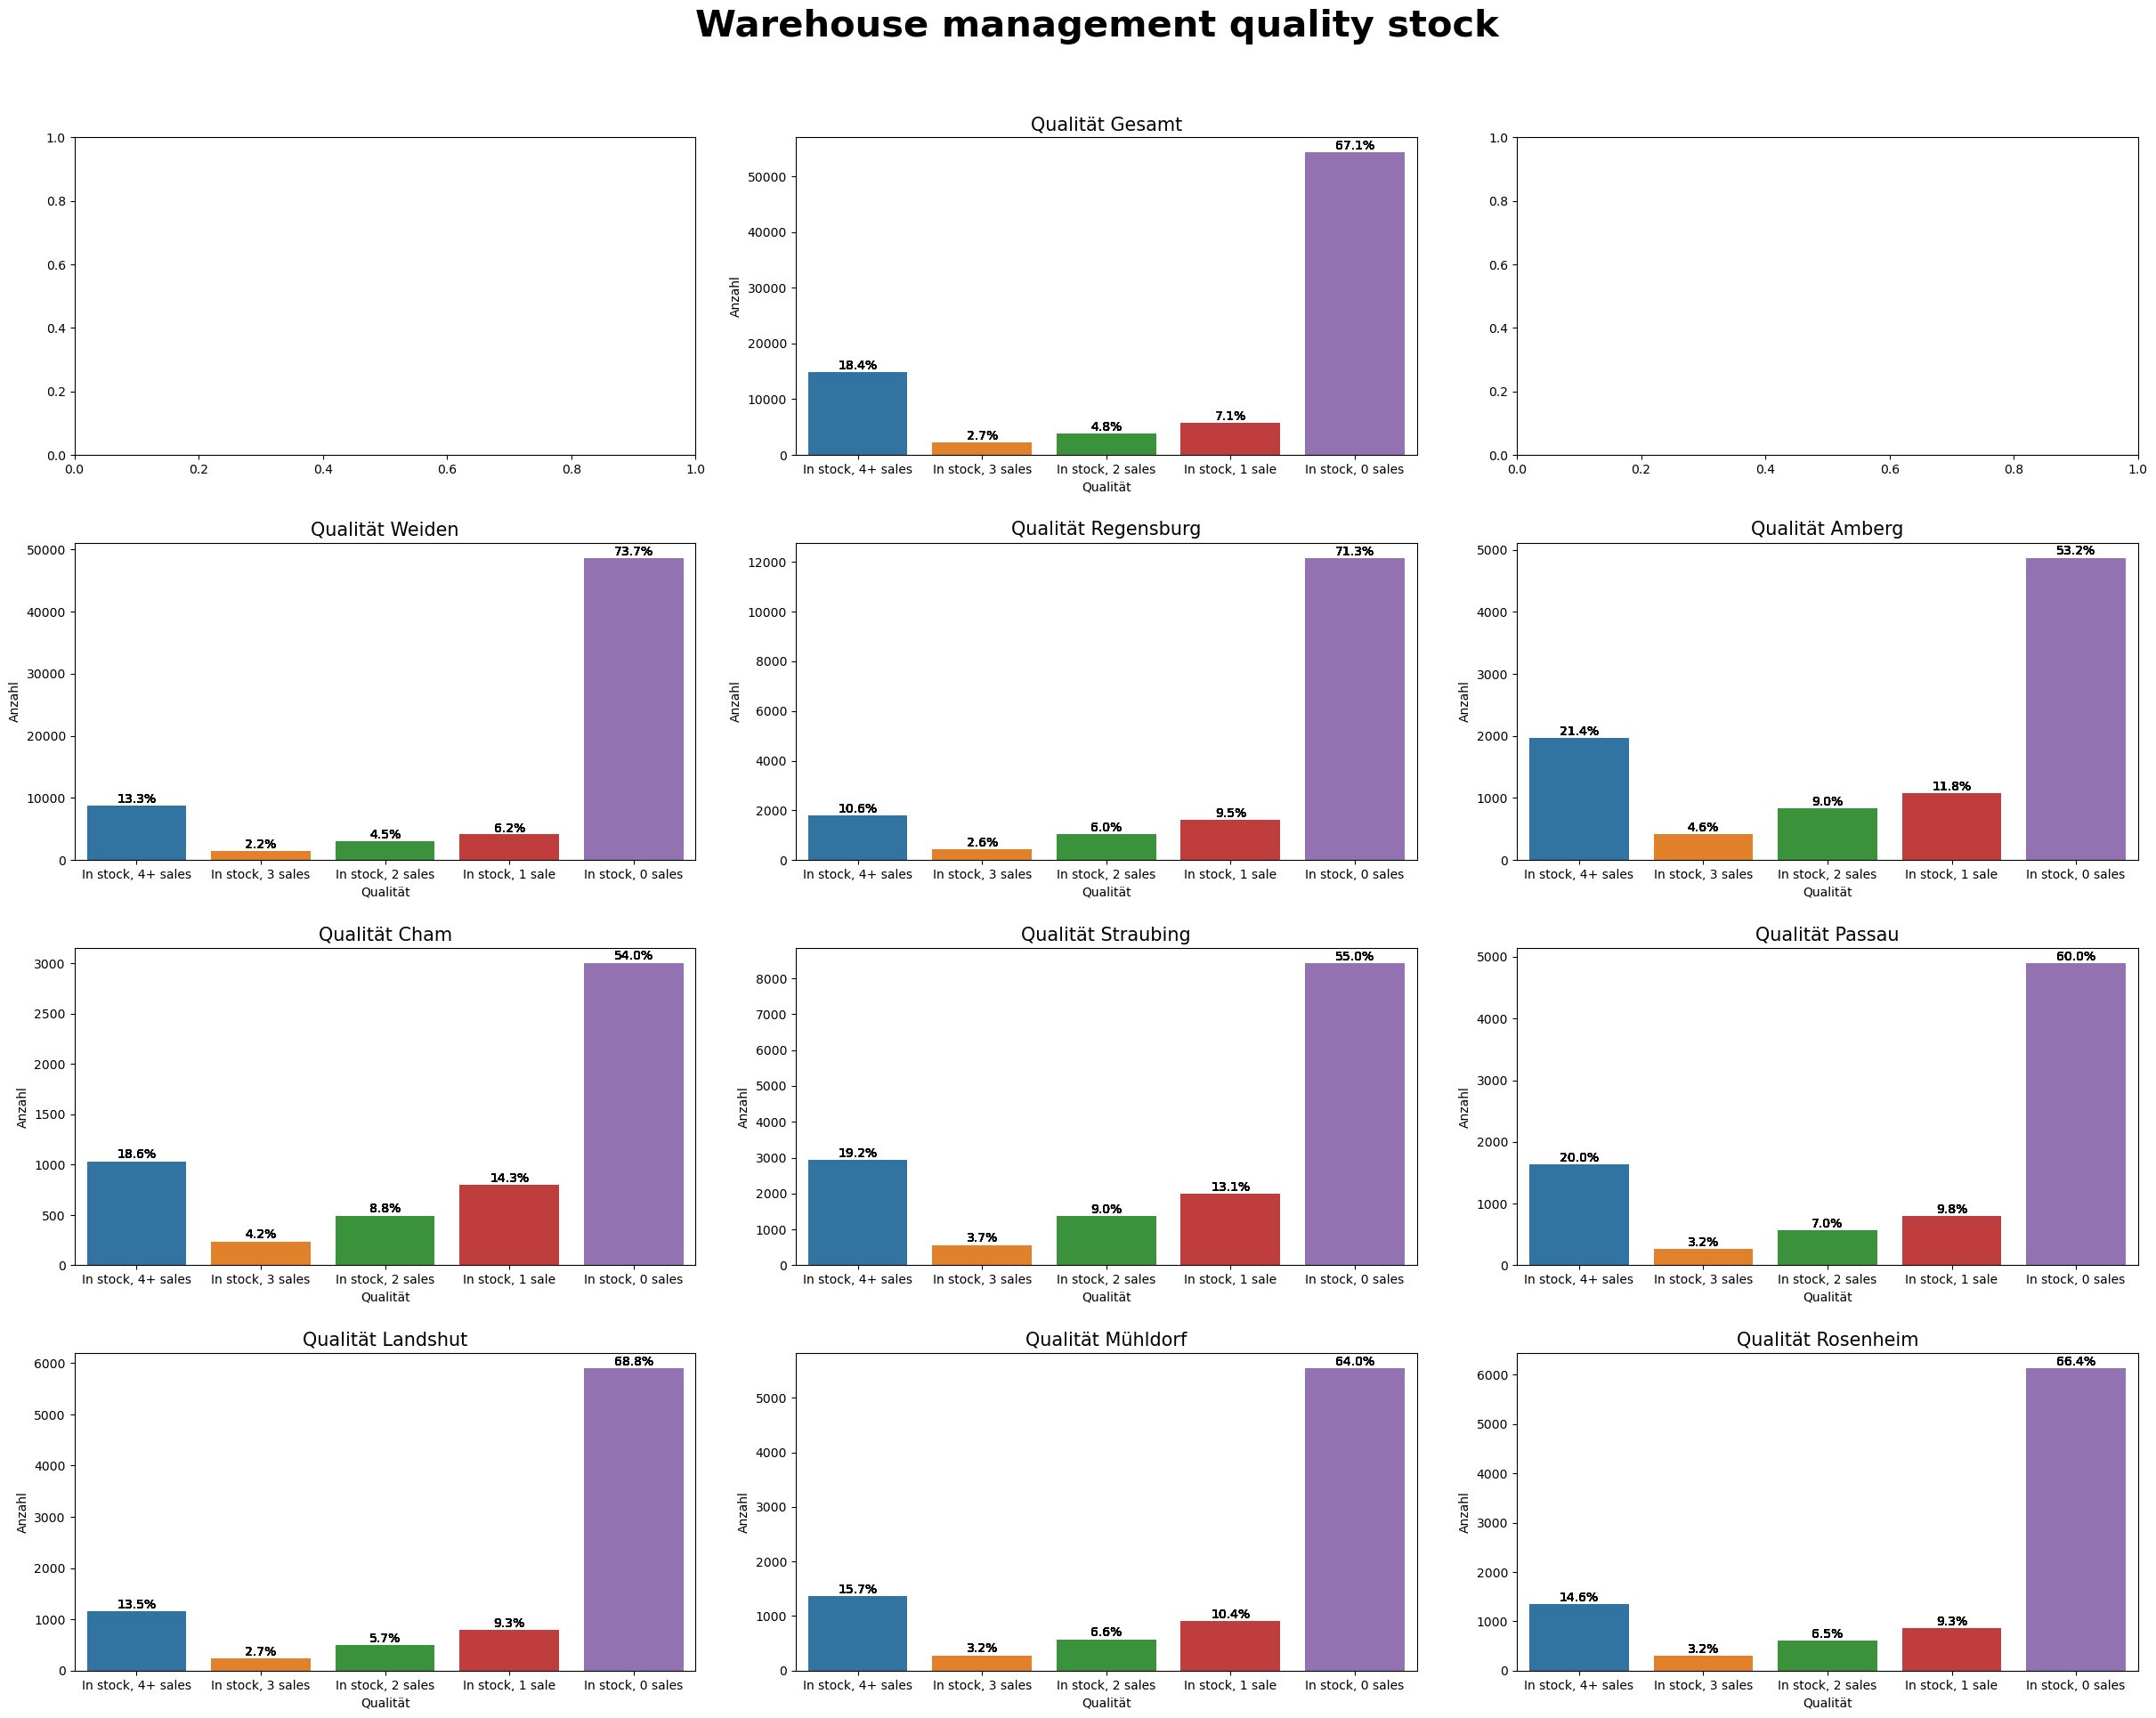

In [26]:
locations = {'gesamt': 'Gesamt', 
             'wen': 'Weiden', 
             'rgb': 'Regensburg', 
             'amb': 'Amberg', 
             'cha': 'Cham', 
             'str': 'Straubing', 
             'pas': 'Passau', 
             'lan': 'Landshut', 
             'müh': 'Mühldorf', 
             'ros': 'Rosenheim'}

PE_categories = ['In stock, 4+ sales', 'In stock, 3 sales', 'In stock, 2 sales', 'In stock, 1 sale', 'In stock, 0 sales']
display_order_quality = PE_categories

for x in locations.keys():
    PE_condition = [
        (df_master[x+'_lager'] > 0) & (df_master[x+'_vk'] > 3),
        (df_master[x+'_lager'] > 0) & (df_master[x+'_vk'] == 3),
        (df_master[x+'_lager'] > 0) & (df_master[x+'_vk'] == 2),
        (df_master[x+'_lager'] > 0) & (df_master[x+'_vk'] == 1),
        (df_master[x+'_lager'] > 0) & (df_master[x+'_vk'] == 0)   
    ]

    df_master[x+'_quality'] = np.select(PE_condition, PE_categories)

fig, axes = plt.subplots(4, 3, figsize=(25,20))
fig.suptitle('Warehouse management quality stock', fontweight='bold', fontsize=30)
fig.tight_layout(pad=5.0)

for i in range (13):
    y = 0
    z = 1

    for key, value in locations.items():

            
        location = df_master.query(key + '_quality != "0"')

        sub = sns.countplot(ax=axes[y, z], x=key + '_quality', data=location, order=display_order_quality)
        axes[y, z].set_title("Qualität " + value, fontsize=15.0)
        axes[y, z].set_xlabel('Qualität', fontsize=10.0)
        axes[y, z].set_ylabel('Anzahl', fontsize=10.0)
        # Erhalten Sie die Gesamtzahl der Qualitätsspalte
        total = location[key + '_quality'].count()

        freq_series = location[key + '_quality'].value_counts()
        freq_series = freq_series.reindex(display_order_quality)

        rects = sub.patches
        labels = [f'{(x/total)*100:.1f}%' for x in freq_series]
        for rect, label in zip(rects, labels):
            height = rect.get_height()
            axes[y, z].text(rect.get_x() + rect.get_width() / 2, height + 5, label,
                    ha='center', va='bottom')
            
        z += 1  
        if y == 0 and z == 2:
            y = 1
            z = 0
            
        elif z >= 3:
            y += 1
            z = 0


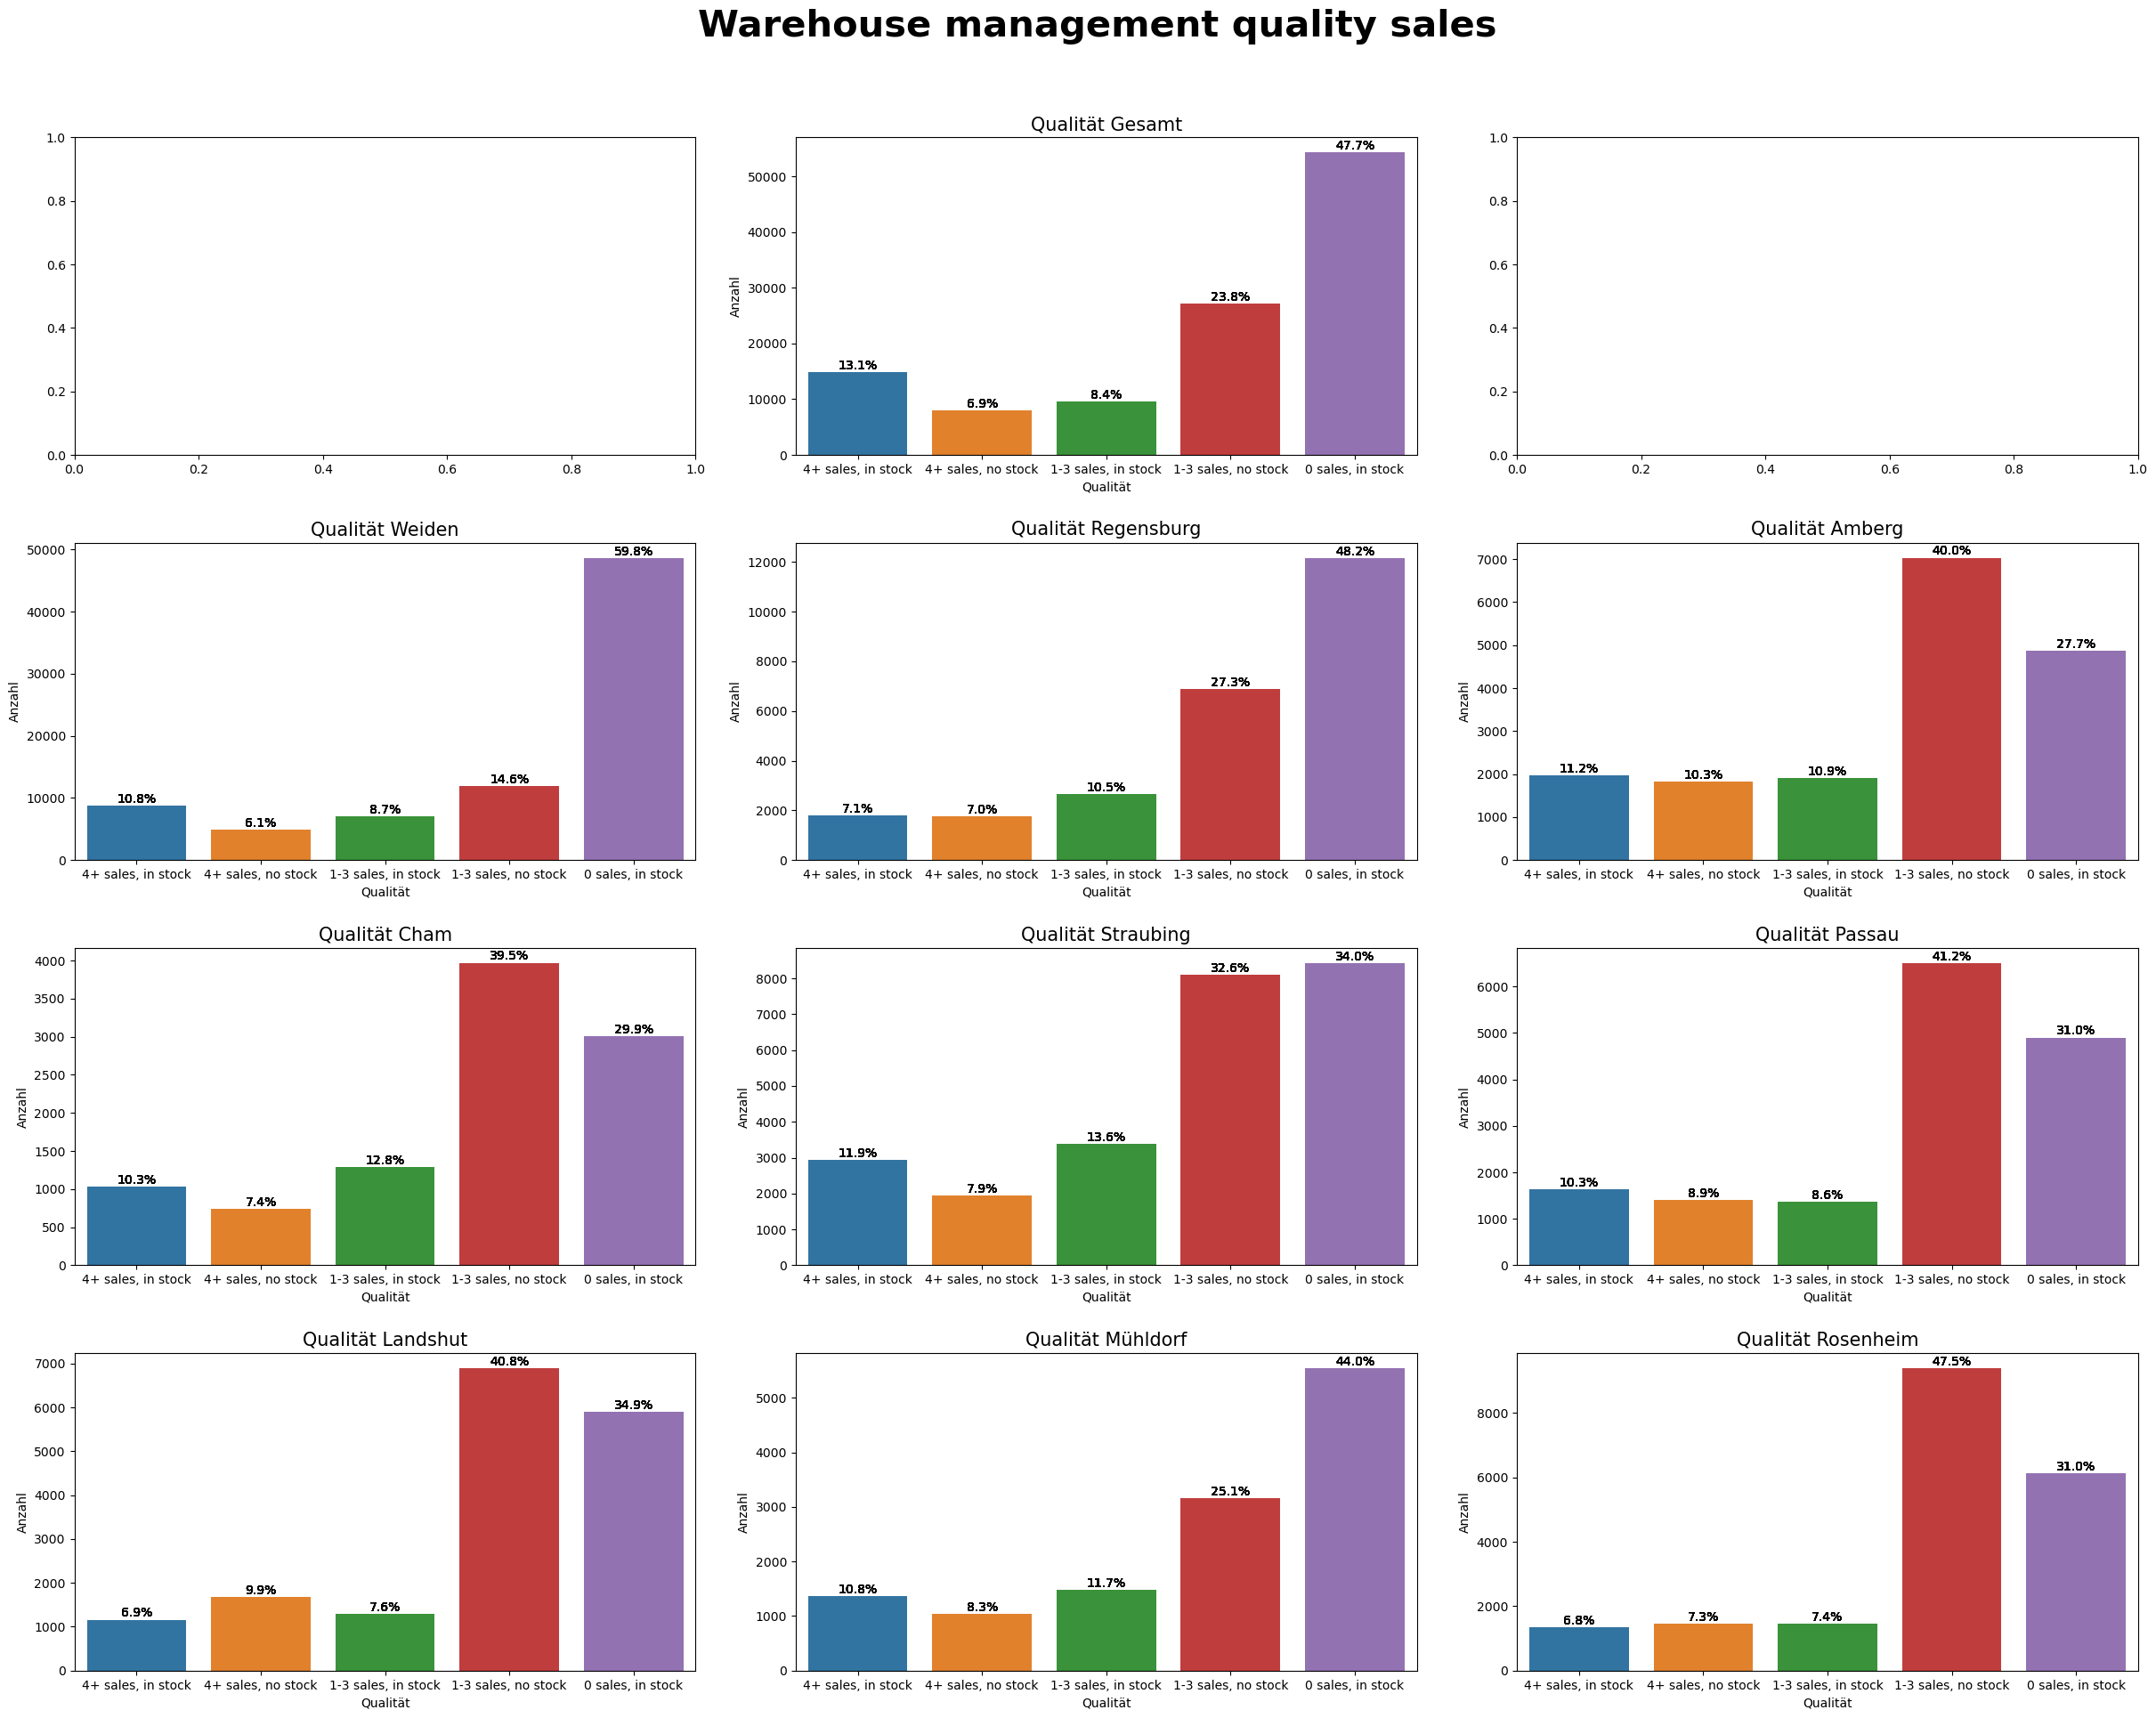

In [27]:
locations = {'gesamt': 'Gesamt', 
             'wen': 'Weiden', 
             'rgb': 'Regensburg', 
             'amb': 'Amberg', 
             'cha': 'Cham', 
             'str': 'Straubing', 
             'pas': 'Passau', 
             'lan': 'Landshut', 
             'müh': 'Mühldorf', 
             'ros': 'Rosenheim'}

PE_categories = ['4+ sales, in stock', '4+ sales, no stock', '1-3 sales, in stock', '1-3 sales, no stock', '0 sales, in stock']
display_order_quality = PE_categories

for x in locations.keys():
    PE_condition = [
        (df_master[x+'_lager'] > 0) & (df_master[x+'_vk'] > 3),
        (df_master[x+'_lager'] == 0) & (df_master[x+'_vk'] > 3),
        (df_master[x+'_lager'] > 0) & (df_master[x+'_vk'] < 3) & (df_master[x+'_vk'] > 0),
        (df_master[x+'_lager'] == 0) & (df_master[x+'_vk'] < 3) & (df_master[x+'_vk'] > 0),
        (df_master[x+'_lager'] > 0) & (df_master[x+'_vk'] == 0)
    ]

    df_master[x+'_quality'] = np.select(PE_condition, PE_categories)

fig, axes = plt.subplots(4, 3, figsize=(25,20))
fig.suptitle('Warehouse management quality sales', fontweight='bold', fontsize=30)
fig.tight_layout(pad=5.0)

for i in range (13):
    y = 0
    z = 1

    for key, value in locations.items():

            
        location = df_master.query(key + '_quality != "0"').reset_index()

        sub = sns.countplot(ax=axes[y, z], x=key + '_quality', data=location, order=display_order_quality)
        axes[y, z].set_title("Qualität " + value, fontsize=15.0)
        axes[y, z].set_xlabel('Qualität', fontsize=10.0)
        axes[y, z].set_ylabel('Anzahl', fontsize=10.0)
        # Erhalten Sie die Gesamtzahl der Qualitätsspalte
        total = location[key + '_quality'].count()

        freq_series = location[key + '_quality'].value_counts()
        freq_series = freq_series.reindex(display_order_quality)

        rects = sub.patches
        labels = [f'{(x/total)*100:.1f}%' for x in freq_series]
        for rect, label in zip(rects, labels):
            height = rect.get_height()
            axes[y, z].text(rect.get_x() + rect.get_width() / 2, height + 5, label,
                    ha='center', va='bottom')
            
        z += 1  
        if y == 0 and z == 2:
            y = 1
            z = 0
            
        elif z >= 3:
            y += 1
            z = 0


## Erstellung Algorithmus/Methode zur Optimierung der Umlagerungsaufträge

Wenn ein Artikel auf Lager ist aber weniger als 4 mal verkauft wurde soll dieser in ein lager geliefert werden der den Artikel nicht auf Lager hat aber ihn mehr als 3 mal verkauft hat.


when '0 sales, on stock' or '1-3 sales on stock' then stock divided by the number of warehouses with "4+ sales, no stock" and move them there.



In [28]:
location

,level_0,lfnr,lieferant,artnr,beschreibung,index,basispreis,basispr_summe,gesamt_lager,ltz_vk_ges,wen_lager,ltz_vk_wen,rgb_lager,ltz_vk_rgb,amb_lager,ltz_vk_amb,cha_lager,ltz_vk_cha,str_lager,ltz_vk_str,...,gesamt_vk,wen_vk,rgb_vk,str_vk,pas_vk,amb_vk,cha_vk,lan_vk,müh_vk,ros_vk,gesamt_quality,wen_quality,rgb_quality,amb_quality,cha_quality,str_quality,pas_quality,lan_quality,müh_quality,ros_quality
0,299,430,Eberspächer Abgas,12.328.90,B MONTAGESATZ VW PASSAT,0,2.30,27.60,12.00,2022-08-16 00:00:00,9.00,2022-03-24 00:00:00,1.00,2019-06-28 00:00:00,0.00,2015-09-29 00:00:00,0.00,2017-11-22 00:00:00,0.00,2018-07-19 00:00:00,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,"1-3 sales, in stock","0 sales, in stock","0 sales, in stock",0,0,0,"0 sales, in stock","1-3 sales, no stock",0,"0 sales, in stock"
1,300,430,Eberspächer Abgas,12.288.90,B GUMMIPUFFER VAG,0,0.44,23.76,54.00,2023-02-03 00:00:00,44.00,2023-02-03 00:00:00,6.00,2021-05-19 00:00:00,0.00,2020-07-31 00:00:00,0.00,0,0.00,2013-09-18 00:00:00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"0 sales, in stock","0 sales, in stock","0 sales, in stock",0,0,0,0,0,"0 sales, in stock","0 sales, in stock"
2,332,135,SKF,VKM61011,MULTI-V-UMLENKROLLE TOYOTA,0,18.42,0.00,0.00,2022-07-28 00:00:00,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,"1-3 sales, no stock",0,0,0,0,0,0,0,0,"1-3 sales, no stock"
3,342,135,SKF,VKM62022,VKM 62022,0,13.13,0.00,0.00,2022-04-12 00:00:00,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,"1-3 sales, no stock",0,0,0,0,0,0,0,0,"1-3 sales, no stock"
4,399,135,SKF,VKM66009,SPANNROLLE NEBENTRIEB SUZUKI,0,46.95,0.00,0.00,2022-10-20 00:00:00,0.00,0,0.00,0,0.00,0,0.00,0,0.00,2020-03-11 00:00:00,...,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,"1-3 sales, no stock",0,0,0,0,0,0,0,0,"1-3 sales, no stock"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19776,365908,192,MEYER MOTOREN,14024270,MM Zylinderkopf NEU VW 1.9/2.0,90,950.40,0.00,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,"1-3 sales, no stock",0,0,0,0,0,0,0,0,"1-3 sales, no stock"
19777,365916,192,MEYER MOTOREN,11998720,MM RUMPF-MOTOR 1.6 TDI (CR),90,"2,746.08",0.00,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,"1-3 sales, no stock",0,0,0,0,0,0,0,0,"1-3 sales, no stock"
19778,365917,192,MEYER MOTOREN,11998420,RUMPFMOTOR,90,"2,752.56",0.00,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,"1-3 sales, no stock",0,0,0,0,0,0,0,0,"1-3 sales, no stock"
19779,365918,192,MEYER MOTOREN,10004740,TEILKOMPLETT-MOTOR VW2.5T I.AT,90,"4,858.56",0.00,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,"1-3 sales, no stock",0,0,0,0,0,0,0,0,"1-3 sales, no stock"


In [29]:
""" locations = {'wen': 'Weiden', 
             'rgb': 'Regensburg', 
             'amb': 'Amberg', 
             'cha': 'Cham', 
             'str': 'Straubing', 
             'pas': 'Passau', 
             'lan': 'Landshut', 
             'müh': 'Mühldorf', 
             'ros': 'Rosenheim'}

for key, value in locations.items():
  if (location[key + '_quality'] == "1-3 sales, in stock").any() or (location[key + '_quality'] == "0 sales, in stock").any():
    for k, v in locations.items():
      move_to = []
      if (location[k + '_quality'] == "4+ sales, in stock").any():
        move_to.append(v)
        send_to = ', '.join(move_to)
        location['moving_from_' + k] = 'Send items to ' + send_to
  
location.query('ros_quality == "4+ sales, in stock"')
 """


' locations = {\'wen\': \'Weiden\', \n             \'rgb\': \'Regensburg\', \n             \'amb\': \'Amberg\', \n             \'cha\': \'Cham\', \n             \'str\': \'Straubing\', \n             \'pas\': \'Passau\', \n             \'lan\': \'Landshut\', \n             \'müh\': \'Mühldorf\', \n             \'ros\': \'Rosenheim\'}\n\nfor key, value in locations.items():\n  if (location[key + \'_quality\'] == "1-3 sales, in stock").any() or (location[key + \'_quality\'] == "0 sales, in stock").any():\n    for k, v in locations.items():\n      move_to = []\n      if (location[k + \'_quality\'] == "4+ sales, in stock").any():\n        move_to.append(v)\n        send_to = \', \'.join(move_to)\n        location[\'moving_from_\' + k] = \'Send items to \' + send_to\n  \nlocation.query(\'ros_quality == "4+ sales, in stock"\')\n '

In [30]:
""" locations = {'wen': 'Weiden', 
             'rgb': 'Regensburg', 
             'amb': 'Amberg', 
             'cha': 'Cham', 
             'str': 'Straubing', 
             'pas': 'Passau', 
             'lan': 'Landshut', 
             'müh': 'Mühldorf', 
             'ros': 'Rosenheim'}

for key, value in locations.items():
    for index, row in location.iterrows():
        if (location.loc[index, key + '_quality'] == '1-3 sales, in stock') | (location.loc[index, key + '_quality'] == '0 sales, in stock'):
            for k, v in locations.items():
              for index, row in location.iterrows():
                move_to = []
                if (location.loc[index, key + '_quality'] == '4+ sales, in stock'):
                  move_to.append(v)
                  send_to = ', '.join(move_to)
                  location['moving_from_' + k] = 'Send items to ' + send_to

location """
        






"""   if (location[key + '_quality'] == "1-3 sales, in stock").any() or (location[key + '_quality'] == "0 sales, in stock").any():
    for k, v in locations.items():
      move_to = []
      if (location[k + '_quality'] == "4+ sales, in stock").any():
        move_to.append(v)
        send_to = ', '.join(move_to)
        location['moving_from_' + k] = 'Send items to ' + send_to
  
location.query('ros_quality == "4+ sales, in stock"') """

'   if (location[key + \'_quality\'] == "1-3 sales, in stock").any() or (location[key + \'_quality\'] == "0 sales, in stock").any():\n    for k, v in locations.items():\n      move_to = []\n      if (location[k + \'_quality\'] == "4+ sales, in stock").any():\n        move_to.append(v)\n        send_to = \', \'.join(move_to)\n        location[\'moving_from_\' + k] = \'Send items to \' + send_to\n  \nlocation.query(\'ros_quality == "4+ sales, in stock"\') '

In [40]:
locations = {'wen': 'Weiden', 
             'rgb': 'Regensburg', 
             'amb': 'Amberg', 
             'cha': 'Cham', 
             'str': 'Straubing', 
             'pas': 'Passau', 
             'lan': 'Landshut', 
             'müh': 'Mühldorf', 
             'ros': 'Rosenheim'}

for key, value in locations.items():
    location['take_from_' + key] = location.apply(lambda row: ', '.join([v for k, v in locations.items() if row[k + '_quality'] == '4+ sales, no stock']) if row[key + '_quality'] in ['1-3 sales, in stock', '0 sales, in stock'] else '-', axis=1)

location.query('amb_quality == "4+ sales, no stock"')

,level_0,lfnr,lieferant,artnr,beschreibung,index,basispreis,basispr_summe,gesamt_lager,ltz_vk_ges,wen_lager,ltz_vk_wen,rgb_lager,ltz_vk_rgb,amb_lager,ltz_vk_amb,cha_lager,ltz_vk_cha,str_lager,ltz_vk_str,...,ros_vk,gesamt_quality,wen_quality,rgb_quality,amb_quality,cha_quality,str_quality,pas_quality,lan_quality,müh_quality,ros_quality,take_from_wen,take_from_rgb,take_from_amb,take_from_cha,take_from_str,take_from_pas,take_from_lan,take_from_müh,take_from_ros
107,8235,134,WEBASTO,5111162A,LADESTATION NEXT 22KW/7M KABEL,0,564.12,0.00,0.00,2023-03-22 00:00:00,0.00,2023-03-22 00:00:00,0.00,2022-08-17 00:00:00,0.00,2022-08-17 00:00:00,0.00,0,0.00,2022-08-10 00:00:00,...,1.00,"4+ sales, no stock","1-3 sales, no stock","1-3 sales, no stock","4+ sales, no stock",0,"1-3 sales, no stock",0,0,0,"1-3 sales, no stock",-,-,-,-,-,-,-,-,-
123,9609,135,SKF,VKJP3148,"FALTENBALG OPEL, VAUXHALL",0,13.39,93.73,7.00,2023-05-25 00:00:00,1.00,2023-05-25 00:00:00,1.00,2023-03-15 00:00:00,0.00,2023-04-26 00:00:00,1.00,2022-05-31 00:00:00,1.00,2023-05-17 00:00:00,...,2.00,"4+ sales, in stock","4+ sales, in stock","0 sales, in stock","4+ sales, no stock","1-3 sales, in stock","4+ sales, in stock","1-3 sales, no stock","0 sales, in stock","0 sales, in stock","1-3 sales, in stock",-,Amberg,-,Amberg,-,-,Amberg,Amberg,Amberg
150,10147,135,SKF,VKBA3657,"RADLAGERSATZ CITROEN, PEUGEOT",0,20.31,223.41,11.00,2023-05-31 00:00:00,2.00,2023-05-25 00:00:00,2.00,2023-03-08 00:00:00,0.00,2023-05-30 00:00:00,2.00,2023-03-22 00:00:00,0.00,2023-05-31 00:00:00,...,1.00,"4+ sales, in stock","4+ sales, in stock",0,"4+ sales, no stock","0 sales, in stock","4+ sales, no stock","1-3 sales, in stock","0 sales, in stock","0 sales, in stock","1-3 sales, in stock",-,-,-,"Amberg, Straubing",-,"Amberg, Straubing","Amberg, Straubing","Amberg, Straubing","Amberg, Straubing"
175,10401,134,WEBASTO,9030532A,"SCHLAUCH 5X1,5 PA12-ETFE",0,2.21,167.96,76.00,2023-04-12 00:00:00,70.00,2022-12-21 00:00:00,0.00,0,0.00,2022-05-17 00:00:00,0.00,0,0.00,0,...,0.00,"4+ sales, in stock","4+ sales, in stock",0,"4+ sales, no stock",0,0,"0 sales, in stock",0,0,"0 sales, in stock",-,-,-,-,-,Amberg,-,-,Amberg
186,10644,134,WEBASTO,9039217A,KIT TELESTART T99,0,171.40,"1,199.80",7.00,2023-05-31 00:00:00,1.00,2023-05-16 00:00:00,2.00,2022-12-14 00:00:00,0.00,2023-01-11 00:00:00,0.00,2022-03-16 00:00:00,1.00,2023-02-08 00:00:00,...,14.00,"4+ sales, in stock","4+ sales, in stock","1-3 sales, in stock","4+ sales, no stock","1-3 sales, no stock","4+ sales, in stock","4+ sales, no stock","4+ sales, no stock","4+ sales, no stock","4+ sales, in stock",-,"Amberg, Passau, Landshut, Mühldorf",-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18740,359060,115,SONAX,3132000,WASCH & WAX 500ML,0,3.91,0.00,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,...,1.00,"4+ sales, no stock","4+ sales, no stock","1-3 sales, no stock","4+ sales, no stock",0,0,0,0,0,"1-3 sales, no stock",-,-,-,-,-,-,-,-,-
18846,359410,115,SONAX,4174000,FLEXIBLADE,0,9.47,0.00,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,...,2.00,"4+ sales, no stock","1-3 sales, no stock","1-3 sales, no stock","4+ sales, no stock",0,0,0,0,"1-3 sales, no stock","1-3 sales, no stock",-,-,-,-,-,-,-,-,-
18959,359863,0,BOSCH,986352006,AUTO-STECKDOSE,0,3.83,0.00,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,...,1.00,"4+ sales, no stock","1-3 sales, no stock",0,"4+ sales, no stock",0,0,0,"1-3 sales, no stock",0,"1-3 sales, no stock",-,-,-,-,-,-,-,-,-
18990,360048,470,METZGER,901232,"SENSOR, EINPARKHILFE FIAT/JEEP",0,10.34,0.00,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,0.00,0,...,1.00,"4+ sales, no stock",0,0,"4+ sales, no stock",0,0,0,0,0,"1-3 sales, no stock",-,-,-,-,-,-,-,-,-
